## Financial inclusion in Africa

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import data
train_data = pd.read_csv('C:/Users/Hilel/Desktop/Data_Science/Financial Inclusion Survery/Train_v2.csv')
test_data = pd.read_csv('C:/Users/Hilel/Desktop/Data_Science/Financial Inclusion Survery/Test_v2.csv')

print('train data shape :', train_data.shape)
print('test data shape :', test_data.shape)

train data shape : (23524, 13)
test data shape : (10086, 12)


In [2]:
# Inspect train Data
train_data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [3]:
print(train_data.describe())
print(train_data.info())

               year  household_size  age_of_respondent
count  23524.000000    23524.000000       23524.000000
mean    2016.975939        3.797483          38.805220
std        0.847371        2.227613          16.520569
min     2016.000000        1.000000          16.000000
25%     2016.000000        2.000000          26.000000
50%     2017.000000        3.000000          35.000000
75%     2018.000000        5.000000          49.000000
max     2018.000000       21.000000         100.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
country                   23524 non-null object
year                      23524 non-null int64
uniqueid                  23524 non-null object
bank_account              23524 non-null object
location_type             23524 non-null object
cellphone_access          23524 non-null object
household_size            23524 non-null int64
age_of_respondent         23524 non-null int64
gender_of_respo

In [4]:
# Check for missing values
print('missing values:', train_data.isnull().sum())

missing values: country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


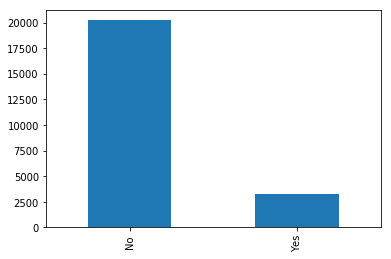

In [5]:
# Target distribution
train_data.bank_account.value_counts().plot(kind='bar')

In [6]:
from sklearn.preprocessing import LabelEncoder
# Convert target label to numerical Data
le = LabelEncoder()
train_data['bank_account'] = le.fit_transform(train_data['bank_account'])
train_data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,1,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


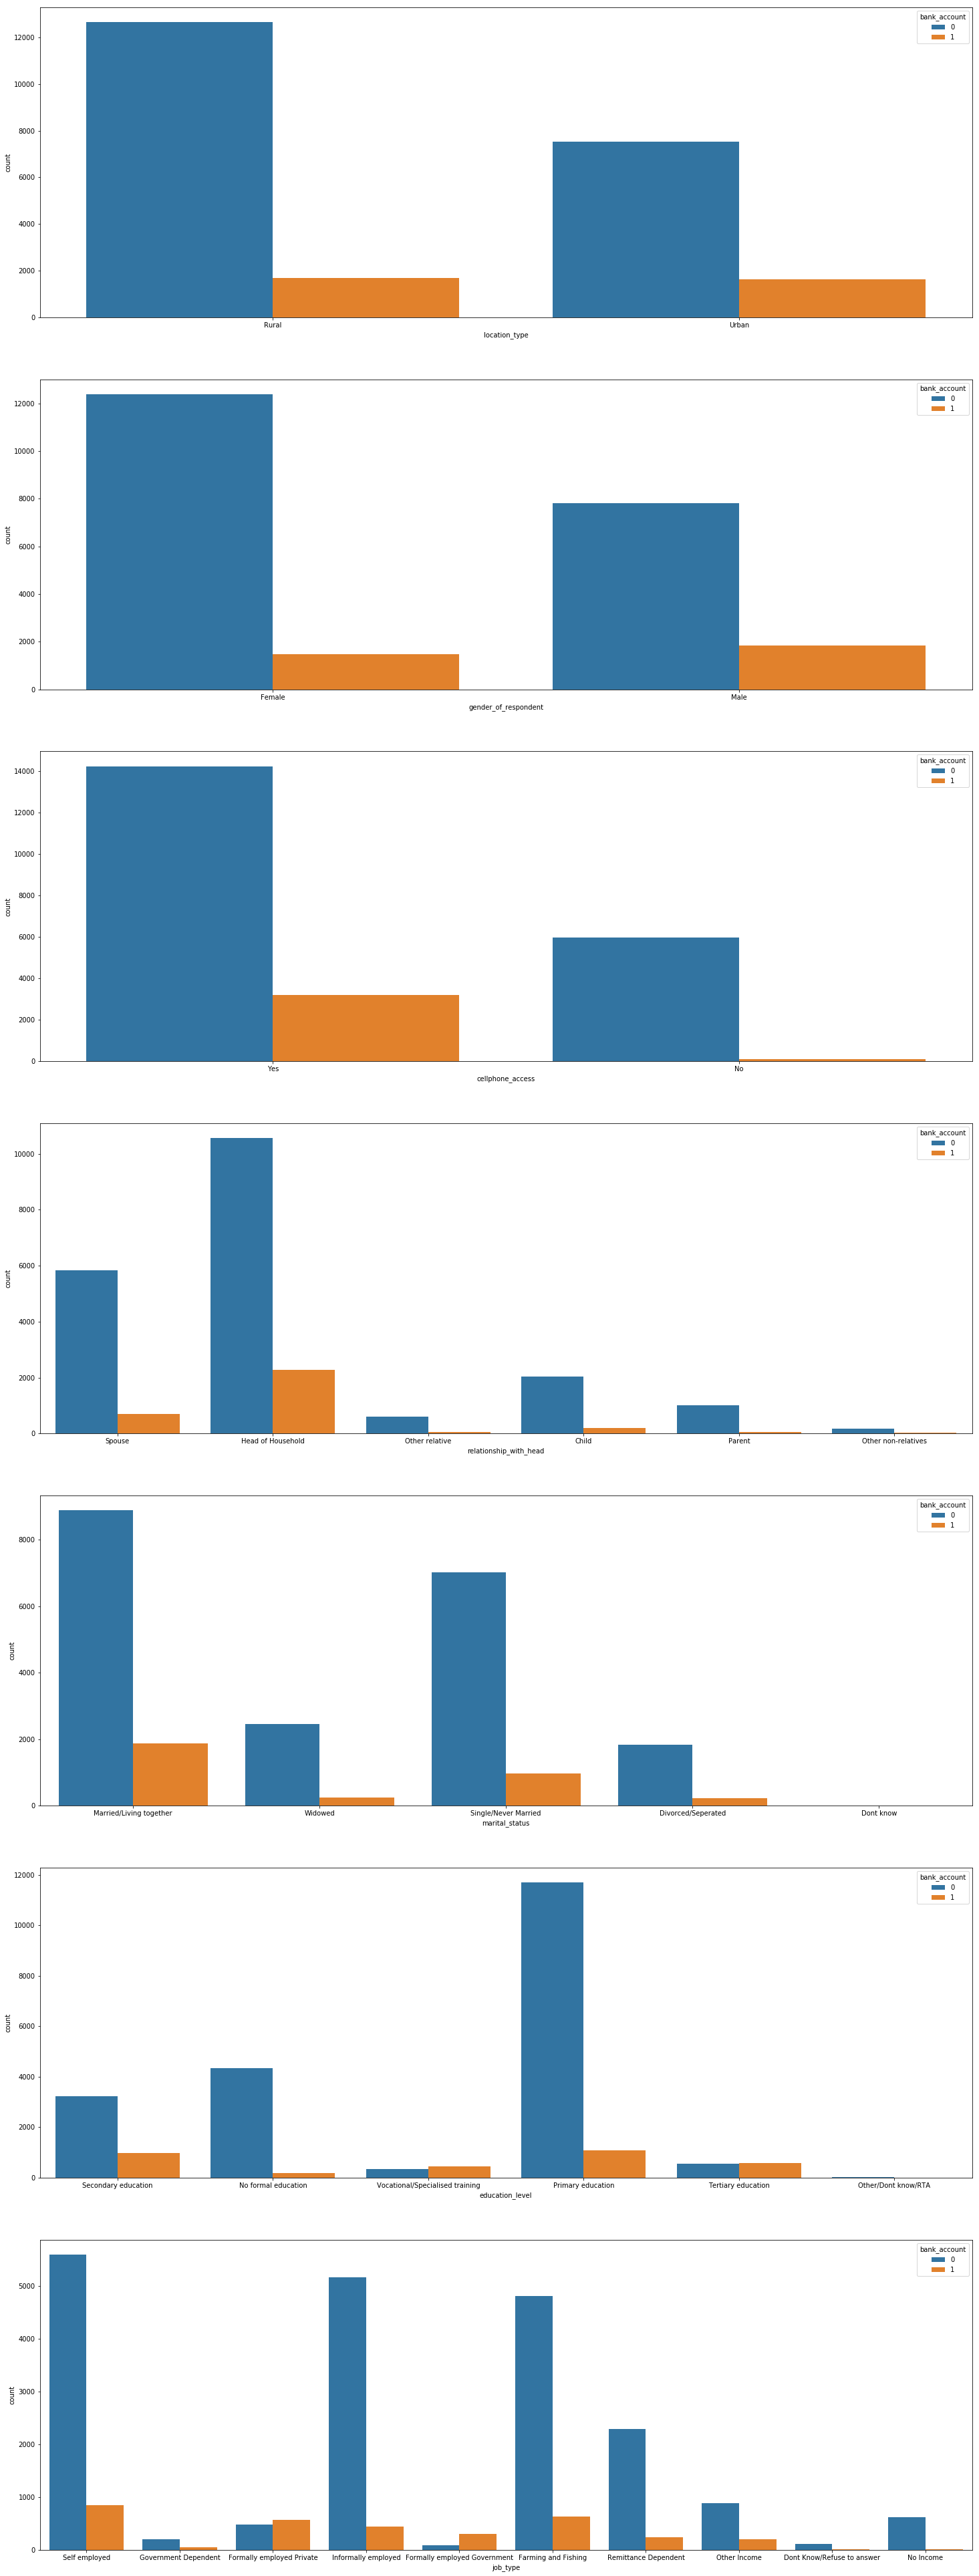

In [7]:
# Data visualisation 
import seaborn as sns

f, axes = plt.subplots(7, 1, figsize=[25, 70])

sns.countplot('location_type', hue= 'bank_account', data=train_data, ax=axes[0])
sns.countplot('gender_of_respondent', hue= 'bank_account', data=train_data, ax=axes[1])
sns.countplot('cellphone_access', hue= 'bank_account', data=train_data, ax=axes[2])
sns.countplot('relationship_with_head', hue= 'bank_account', data=train_data, ax=axes[3])
sns.countplot('marital_status', hue= 'bank_account', data=train_data, ax=axes[4])
sns.countplot('education_level', hue= 'bank_account', data=train_data, ax=axes[5])
sns.countplot('job_type', hue= 'bank_account', data=train_data, ax=axes[6])



In [8]:
train_data['year_'] = train_data['year']
test_data['year_'] = test_data['year']
# Convert the following numerical labels from integer to float
float_array = train_data[['household_size', 'age_of_respondent', 'year_']].values.astype(float)
float_array = test_data[['household_size', 'age_of_respondent', 'year_']].values.astype(float)


In [9]:
# Data preprocessing 
# convert categorical features to numerical features
# categorical features to be converted by One Hot Encoding
train_data['country_'] = train_data['country']
test_data['country_'] = test_data['country']

categ = ['relationship_with_head', 'marital_status', 'education_level', 'job_type', 'country_']
# One Hot Encoding conversion
train_data = pd.get_dummies(train_data, prefix_sep='_', columns = categ)

test_data = pd.get_dummies(test_data, prefix_sep='_', columns = categ)

# Labelncoder conversion
train_data['location_type'] = le.fit_transform(train_data['location_type'])
train_data['cellphone_access'] = le.fit_transform(train_data['cellphone_access'])
train_data['gender_of_respondent'] = le.fit_transform(train_data['gender_of_respondent'])


test_data['location_type'] = le.fit_transform(test_data['location_type'])
test_data['cellphone_access'] = le.fit_transform(test_data['cellphone_access'])
test_data['gender_of_respondent'] = le.fit_transform(test_data['gender_of_respondent'])


train_data.head()


,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,year_,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country__Kenya,country__Rwanda,country__Tanzania,country__Uganda
0,Kenya,2018,uniqueid_1,1,0,1,3,24,0,2018,...,0,0,0,0,0,1,1,0,0,0
1,Kenya,2018,uniqueid_2,0,0,0,5,70,0,2018,...,1,0,0,0,0,0,1,0,0,0
2,Kenya,2018,uniqueid_3,1,1,1,5,26,1,2018,...,0,0,0,0,0,1,1,0,0,0
3,Kenya,2018,uniqueid_4,0,0,1,5,34,0,2018,...,0,0,0,0,0,0,1,0,0,0
4,Kenya,2018,uniqueid_5,0,1,0,8,26,1,2018,...,0,1,0,0,0,0,1,0,0,0


In [10]:
test_data.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,year_,relationship_with_head_Child,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country__Kenya,country__Rwanda,country__Tanzania,country__Uganda
0,Kenya,2018,uniqueid_6056,1,1,3,30,1,2018,0,...,0,0,0,0,0,0,1,0,0,0
1,Kenya,2018,uniqueid_6060,1,1,7,51,1,2018,0,...,0,0,0,0,0,0,1,0,0,0
2,Kenya,2018,uniqueid_6065,0,0,3,77,0,2018,0,...,0,0,0,0,1,0,1,0,0,0
3,Kenya,2018,uniqueid_6072,0,0,6,39,0,2018,0,...,0,0,0,0,1,0,1,0,0,0
4,Kenya,2018,uniqueid_6073,1,0,3,16,1,2018,1,...,0,0,0,0,1,0,1,0,0,0


In [11]:
#Separate training features from target
X_train = train_data.drop(['year', 'uniqueid', 'bank_account', 'country'], axis=1)
y_train = train_data['bank_account']

X_test = test_data.drop(['year', 'uniqueid', 'country'], axis=1)

#rescale X_train and X_test
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
X_train_rescaled = scaler.fit_transform(X_train)
X_test_rescaled = scaler.fit_transform(X_test)



In [12]:
train_data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,year_,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country__Kenya,country__Rwanda,country__Tanzania,country__Uganda
0,Kenya,2018,uniqueid_1,1,0,1,3,24,0,2018,...,0,0,0,0,0,1,1,0,0,0
1,Kenya,2018,uniqueid_2,0,0,0,5,70,0,2018,...,1,0,0,0,0,0,1,0,0,0
2,Kenya,2018,uniqueid_3,1,1,1,5,26,1,2018,...,0,0,0,0,0,1,1,0,0,0
3,Kenya,2018,uniqueid_4,0,0,1,5,34,0,2018,...,0,0,0,0,0,0,1,0,0,0
4,Kenya,2018,uniqueid_5,0,1,0,8,26,1,2018,...,0,1,0,0,0,0,1,0,0,0


In [13]:
X_train_rescaled.shape

(23524, 37)

In [16]:
# Split train_data
from sklearn.model_selection import train_test_split

X_Train, X_val, y_Train, y_val = train_test_split(X_train_rescaled, y_train, stratify = y_train, test_size = 0.2, random_state=42)

In [ ]:
#import XGBClassifier
from xgboost import XGBClassifier

my_model = XGBClassifier()
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Optimize model paramaters 
# I run this code in google colab to make the execution much faster and use the best params in the next code
param_grid = {'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
my_model2 = GridSearchCV(my_model, param_grid)
my_model2.fit(X_Train, y_Train)
print(my_model2.best_params_)


In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score

# fit and Evaluate model
my_model3 = XGBClassifier(min_child_weight = 5, gamma = 0.5, subsample = 0.6, colsample_bytree = 0.6, max_depth = 5)
my_model3.fit(X_Train, y_Train)
y_pred = my_model3.predict(X_val)

# Get error rate
print("Error rate of Random Forest classifier: ", 1 - accuracy_score(y_val, y_pred))

# Get confusion matrix
confusion_matrix(y_pred, y_val)


Error rate of Random Forest classifier:  0.10860786397449518


array([[3943,  411],
       [ 100,  251]], dtype=int64)

In [18]:
# Get the predicted result for the test Data
test_data.bank_account = my_model3.predict(X_test_rescaled)

C:\Users\Hilel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [19]:
# create submission DataFrame
submission_df3 = pd.DataFrame({"uniqueid": test_data["uniqueid"] + " x " + test_data["country"],

"bank_account": test_data.bank_account})

In [20]:
submission_df3.head()

,uniqueid,bank_account
0,uniqueid_6056 x Kenya,1
1,uniqueid_6060 x Kenya,1
2,uniqueid_6065 x Kenya,0
3,uniqueid_6072 x Kenya,0
4,uniqueid_6073 x Kenya,0


In [21]:
# Create submission csv file
submission_df3.to_csv('SubFile.csv', index = False)